# **Instalar librerías**

In [1]:
%pip install qiskit qiskit-ibm-runtime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 54.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 340.8/340.8 kB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 30.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.4/69.4 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 11.1 MB/s eta 0:00:00


In [2]:
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(channel="ibm_quantum", token="INGRESA TU TOKEN")


In [3]:
from qiskit_ibm_runtime import QiskitRuntimeService

# Save an IBM Quantum account and set it as your default account.
QiskitRuntimeService.save_account(
    channel="ibm_quantum",
    token="INGRESA TU TOKEN",
    set_as_default=True,
    # Use `overwrite=True` if you're updating your token.
    overwrite=True,
)

# Load saved credentials
service = QiskitRuntimeService()

In [4]:
from qiskit import QuantumCircuit
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler

# Create empty circuit
example_circuit = QuantumCircuit(2)
example_circuit.measure_all()

# You'll need to specify the credentials when initializing QiskitRuntimeService, if they were not previously saved.
service = QiskitRuntimeService()
backend = service.least_busy(operational=True, simulator=False)

sampler = Sampler(backend)
job = sampler.run([example_circuit])
print(f"job id: {job.job_id()}")
result = job.result()
print(result)

job id: cx1xf8xtpsjg0086g1e0
PrimitiveResult([SamplerPubResult(data=DataBin(meas=BitArray(<shape=(), num_shots=4096, num_bits=2>)), metadata={'circuit_metadata': {}})], metadata={'execution': {'execution_spans': ExecutionSpans([SliceSpan(<start='2024-11-25 01:49:29', stop='2024-11-25 01:49:54', size=4096>)])}, 'version': 2})


In [5]:
#Confrimar que si esté conectado
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService()
service

<QiskitRuntimeService>

In [8]:
from qiskit import transpile

In [7]:
pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 57.8 MB/s eta 0:00:00


# **Primer escenario: Marcar el estado |111> con 3 qubits**

        ┌───┐┌──────────────┐┌───┐┌───┐          ┌───┐┌───┐      ░ ┌─┐      
   q_0: ┤ H ├┤0             ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────░─┤M├──────
        ├───┤│              │├───┤├───┤       │  ├───┤├───┤      ░ └╥┘┌─┐   
   q_1: ┤ H ├┤1 circuit-183 ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────░──╫─┤M├───
        ├───┤│              │├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐ ░  ║ └╥┘┌─┐
   q_2: ┤ H ├┤2             ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─░──╫──╫─┤M├
        └───┘└──────────────┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘ ░  ║  ║ └╥┘
meas: 3/════════════════════════════════════════════════════════════╩══╩══╩═
                                                                    0  1  2 


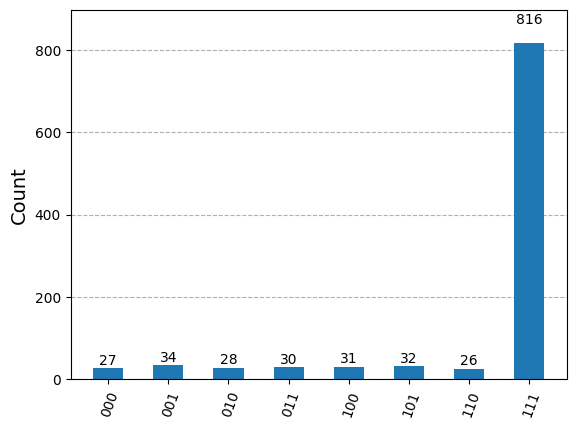

In [12]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit import transpile
from qiskit.visualization import plot_histogram

# Crear un circuito cuántico con 3 qubits
n = 3
qc = QuantumCircuit(n)

# Inicializar el estado de superposición
qc.h(range(n))  # Aplicar la puerta Hadamard a todos los qubits

# Crear un oráculo cuántico que marca el estado |111>
oracle = QuantumCircuit(n)

# Aplicar una puerta Z controlada al último qubit por los primeros dos qubits
oracle.h(2)  # Cambiar el último qubit a la base Z
oracle.ccx(0, 1, 2)  # Puerta Toffoli controlada por los dos primeros qubits
oracle.h(2)  # Volver a la base estándar

# Aplicar el oráculo al circuito principal
qc.append(oracle, range(n))

# Aplicar la inversión sobre la media (operador de Grover)
qc.h(range(n))
qc.x(range(n))  # Aplica NOT a todos los qubits
qc.h(n-1)       # Hadamard al último qubit
qc.mcx(list(range(n-1)), n-1)  # Puerta multi-controlada
qc.h(n-1)       # Deshacer Hadamard al último qubit
qc.x(range(n))  # Deshacer NOT a todos los qubits
qc.h(range(n))

#Medir los resultados
qc.measure_all()

# Mostrar el circuito
print(qc)

# Transpile el circuito para el backend
backend = Aer.get_backend('qasm_simulator')
transpiled_circuit = transpile(qc, backend)

# Ejecutar el circuito
job = backend.run(transpiled_circuit, shots=1024)

# Obtener los resultados
result = job.result()
counts = result.get_counts()

# Mostrar los resultados
plot_histogram(counts)


# **Segundo escenario: Marcar el estado |011> con 4 qubits**

        ┌───┐┌──────────────┐┌───┐┌───┐          ┌───┐┌───┐      ░ ┌─┐         
   q_0: ┤ H ├┤0             ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────░─┤M├─────────
        ├───┤│              │├───┤├───┤       │  ├───┤├───┤      ░ └╥┘┌─┐      
   q_1: ┤ H ├┤1             ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────░──╫─┤M├──────
        ├───┤│  circuit-188 │├───┤├───┤       │  ├───┤├───┤      ░  ║ └╥┘┌─┐   
   q_2: ┤ H ├┤2             ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────░──╫──╫─┤M├───
        ├───┤│              │├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐ ░  ║  ║ └╥┘┌─┐
   q_3: ┤ H ├┤3             ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─░──╫──╫──╫─┤M├
        └───┘└──────────────┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘ ░  ║  ║  ║ └╥┘
meas: 4/════════════════════════════════════════════════════════════╩══╩══╩══╩═
                                                                    0  1  2  3 


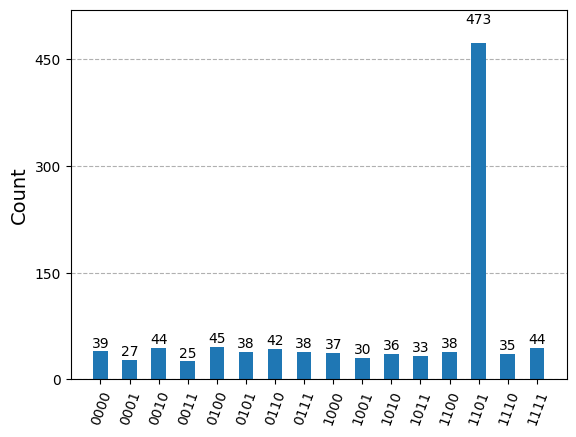

In [13]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit import transpile
from qiskit.visualization import plot_histogram

# Crear un circuito cuántico con 4 qubits
n = 4
qc = QuantumCircuit(n)

# Inicializar el estado de superposición
qc.h(range(n))  # Aplicar la puerta Hadamard a todos los qubits

# Crear un oráculo cuántico personalizado que marca el estado |1011>
oracle = QuantumCircuit(n)

# Configurar el oráculo: usar puertas X para transformar el estado objetivo |1011> en |1111>
oracle.x(1)  # El qubit 1 debe estar en |0>, se invierte para controlarlo

# Aplicar una puerta Z al último qubit controlada por los tres primeros
oracle.h(3)  # Transformar el último qubit a la base Z
oracle.mcx([0, 1, 2], 3)  # Multi-control con los tres primeros qubits
oracle.h(3)  # Volver a la base estándar.

# Deshacer las operaciones de configuración del oráculo
oracle.x(1)

#Aplicar el oráculo al circuito principal
qc.append(oracle, range(n))

# Aplicar la inversión sobre la media (operador de Grover)
qc.h(range(n))
qc.x(range(n))  # Aplica NOT a todos los qubits
qc.h(n-1)       # Hadamard al último qubit
qc.mcx(list(range(n-1)), n-1)  # Puerta multiontrolada
qc.h(n-1)       # Deshacer Hadamard alúltimo qubit
qc.x(range(n))  # Deshacer NOT a todos los qubits
qc.h(range(n))

# Medir los resultados
qc.measure_all()

# Mostrar el circuito
print(qc)

# Transpile el circuito para el backend
backend = Aer.get_backend('qasm_simulator')
transpiled_circuit = transpile(qc, backend)

# Ejecutar el circuito
job = backend.run(transpiled_circuit, shots=1024)

# Obtener los resultados
result = job.result()
counts = result.get_counts()

# Mostrar los resultados
plot_histogram(counts)


# **Tercer escenario: Marcar el estado |10101> con 5 qubits**




        ┌───┐┌──────────────┐┌───┐┌───┐          ┌───┐┌───┐      ░ ┌─┐         »
   q_0: ┤ H ├┤0             ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────░─┤M├─────────»
        ├───┤│              │├───┤├───┤       │  ├───┤├───┤      ░ └╥┘┌─┐      »
   q_1: ┤ H ├┤1             ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────░──╫─┤M├──────»
        ├───┤│              │├───┤├───┤       │  ├───┤├───┤      ░  ║ └╥┘┌─┐   »
   q_2: ┤ H ├┤2 circuit-178 ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────░──╫──╫─┤M├───»
        ├───┤│              │├───┤├───┤       │  ├───┤├───┤      ░  ║  ║ └╥┘┌─┐»
   q_3: ┤ H ├┤3             ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────░──╫──╫──╫─┤M├»
        ├───┤│              │├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐ ░  ║  ║  ║ └╥┘»
   q_4: ┤ H ├┤4             ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─░──╫──╫──╫──╫─»
        └───┘└──────────────┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘ ░  ║  ║  ║  ║ »
meas: 5/════════════════════════════════════════════════════════════╩══╩══╩══╩═»
                            

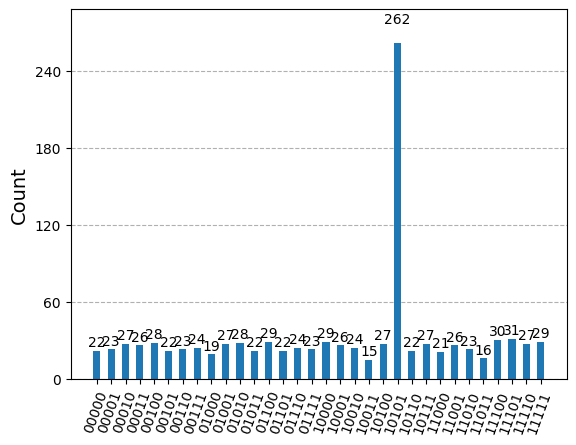

In [11]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit import transpile
from qiskit.visualization import plot_histogram

# Crear un circuito cuántico con 5 qubits
n = 5
qc = QuantumCircuit(n)

# Inicializar el estado de superposición
qc.h(range(n))  # Aplicar la puerta Hadamard a todos los qubits

# Crear un oráculo cuántico personalizado que marca el estado |10101>
oracle = QuantumCircuit(n)

# Configurar el oráculo: usar puertas X para transformar el estado objetivo |10101> en |11111>
oracle.x(1)  # Qubit 1 debe estar en |0>
oracle.x(3)  # Qubit 3 debe estar en |0>

# Aplicar una puerta Z al último qubit controlada por los demás (puerta multi-controlada)
oracle.h(4)  # Transformar el último qubit en la base Z
oracle.mcx([0, 1, 2, 3], 4)  # Multi-control con los 4 primeros qubits
oracle.h(4)  # Volver a la base estándar

# Deshacer las operaciones de transformación del estado
oracle.x(1)
oracle.x(3)

# Aplicar el oráculo al circuito principal
qc.append(oracle, range(n))

# Aplicar la inversión sobre la media (operador de Grover)
qc.h(range(n))
qc.x(range(n))  # Aplica NOT a todos los qubits
qc.h(n-1)       # Hadamard al último qubit
qc.mcx(list(range(n-1)), n-1)  # Puerta controlada múltiple
qc.h(n-1)       # Deshacer Hadamard al último qubit
qc.x(range(n))  # Deshacer NOT a todos los qubits
qc.h(range(n))

# Medir los resultados
qc.measure_all()

# Mostrar el circuito
print(qc)

# Transpile el circuito para el backend
backend = Aer.get_backend('qasm_simulator')
transpiled_circuit = transpile(qc, backend)

# Ejecutar el circuito
job = backend.run(transpiled_circuit, shots=1024)

# Obtener los resultados
result = job.result()
counts = result.get_counts()

# Mostrar los resultados
plot_histogram(counts)
